# 1) Plot Iris Dataset

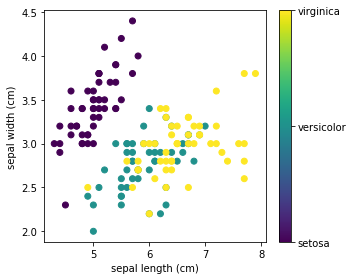

In [1]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

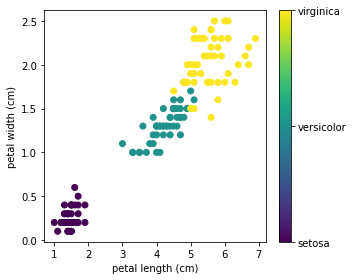

In [2]:
# The indices of the features that we are plotting
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [9]:
# Installation of pyspark 
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 217.8MB 61kB/s 
     |████████████████████████████████| 204kB 45.7MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=fcf4380cc3889c42bc7f6b7bceabc946df7a7054f6b80f16d4733c27bf7393cc
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 35.8 MB of archives.
After this operation, 140 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [10]:
# for printing data
from __future__ import print_function

import numpy as np
import pandas as pd
# for plots
import matplotlib.pyplot as plt
# for 3D plots of the data
from mpl_toolkits.mplot3d import Axes3D
# for dataset generation
from sklearn.datasets.samples_generator import make_blobs
# spark context
import pyspark
from pyspark import SparkContext
# for k-means clusteringg
from pyspark.ml.clustering import KMeans
# for storing of  all features as an array of floats
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

%matplotlib inline

# pyspark version
print (pyspark.__version__)

2.4.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
#iris data
df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df_iris['id'] = 'row'+df_iris.index.astype(str)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),id
0,5.1,3.5,1.4,0.2,row0
1,4.9,3.0,1.4,0.2,row1
2,4.7,3.2,1.3,0.2,row2
3,4.6,3.1,1.5,0.2,row3
4,5.0,3.6,1.4,0.2,row4


In [0]:
# Save the ndarray as a csv file. please check the input.csv file is avaliable in the left side --> File panel
df_iris.to_csv('/content/sample_data/iris1.csv', index=False)

In [0]:
#Initilization of sparkcontext. it should be executed only one time in the program
sc = SparkContext(appName="PythonKMeansOnIris") 
sqlContext = SQLContext(sc)

In [0]:
FEATURES_COL = iris.feature_names
path = '/content/sample_data/iris1.csv'

In [59]:
df1 = sqlContext.read.csv(path, header=True) # requires spark 2.0
df1.show()

+-----------------+----------------+-----------------+----------------+-----+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|   id|
+-----------------+----------------+-----------------+----------------+-----+
|              5.1|             3.5|              1.4|             0.2| row0|
|              4.9|             3.0|              1.4|             0.2| row1|
|              4.7|             3.2|              1.3|             0.2| row2|
|              4.6|             3.1|              1.5|             0.2| row3|
|              5.0|             3.6|              1.4|             0.2| row4|
|              5.4|             3.9|              1.7|             0.4| row5|
|              4.6|             3.4|              1.4|             0.3| row6|
|              5.0|             3.4|              1.5|             0.2| row7|
|              4.4|             2.9|              1.4|             0.2| row8|
|              4.9|             3.1|              1.5|          

In [0]:
# converting the datat to spark DataFrame
l = iris.feature_names
l.pop(l.index('id'))
print(iris.feature_names)

In [60]:
Df = df1.toDF(*l)
print (Df)
Df.show()

DataFrame[sepal length (cm): string, sepal width (cm): string, petal length (cm): string, petal width (cm): string, id: string]
+-----------------+----------------+-----------------+----------------+-----+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|   id|
+-----------------+----------------+-----------------+----------------+-----+
|              5.1|             3.5|              1.4|             0.2| row0|
|              4.9|             3.0|              1.4|             0.2| row1|
|              4.7|             3.2|              1.3|             0.2| row2|
|              4.6|             3.1|              1.5|             0.2| row3|
|              5.0|             3.6|              1.4|             0.2| row4|
|              5.4|             3.9|              1.7|             0.4| row5|
|              4.6|             3.4|              1.4|             0.3| row6|
|              5.0|             3.4|              1.5|             0.2| row7|
|             

In [66]:
iris.feature_names.pop(iris.feature_names.index('id'))
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
Df = Df.withColumnRenamed('sepal length (cm)','sepalLength')
Df = Df.withColumnRenamed('sepal width (cm)','sepalWidth')
Df = Df.withColumnRenamed('petal length (cm)','petalLength')
Df = Df.withColumnRenamed('petal width (cm)','petalWidth')

In [81]:
FEATURES_COL = ['sepalLength','sepalWidth','petalLength','petalWidth']
df_num = Df.select(Df.sepalLength.cast('float'),Df.sepalWidth.cast("float"),Df.petalLength.cast("float"),Df.petalWidth.cast("float"),Df.id.cast("string"))
df_num.show()

+-----------+----------+-----------+----------+-----+
|sepalLength|sepalWidth|petalLength|petalWidth|   id|
+-----------+----------+-----------+----------+-----+
|        5.1|       3.5|        1.4|       0.2| row0|
|        4.9|       3.0|        1.4|       0.2| row1|
|        4.7|       3.2|        1.3|       0.2| row2|
|        4.6|       3.1|        1.5|       0.2| row3|
|        5.0|       3.6|        1.4|       0.2| row4|
|        5.4|       3.9|        1.7|       0.4| row5|
|        4.6|       3.4|        1.4|       0.3| row6|
|        5.0|       3.4|        1.5|       0.2| row7|
|        4.4|       2.9|        1.4|       0.2| row8|
|        4.9|       3.1|        1.5|       0.1| row9|
|        5.4|       3.7|        1.5|       0.2|row10|
|        4.8|       3.4|        1.6|       0.2|row11|
|        4.8|       3.0|        1.4|       0.1|row12|
|        4.3|       3.0|        1.1|       0.1|row13|
|        5.8|       4.0|        1.2|       0.2|row14|
|        5.7|       4.4|    

In [82]:
#Create a features column to be used in the clustering. 
#It need to store all features as an array of floats
# it store the resultant array as a column called "features". 
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_num).select('id', 'features')
df_kmeans.show()

+-----+--------------------+
|   id|            features|
+-----+--------------------+
| row0|[5.09999990463256...|
| row1|[4.90000009536743...|
| row2|[4.69999980926513...|
| row3|[4.59999990463256...|
| row4|[5.0,3.5999999046...|
| row5|[5.40000009536743...|
| row6|[4.59999990463256...|
| row7|[5.0,3.4000000953...|
| row8|[4.40000009536743...|
| row9|[4.90000009536743...|
|row10|[5.40000009536743...|
|row11|[4.80000019073486...|
|row12|[4.80000019073486...|
|row13|[4.30000019073486...|
|row14|[5.80000019073486...|
|row15|[5.69999980926513...|
|row16|[5.40000009536743...|
|row17|[5.09999990463256...|
|row18|[5.69999980926513...|
|row19|[5.09999990463256...|
+-----+--------------------+
only showing top 20 rows



In [0]:
#To optimize k we cluster a fraction of the data for different choices of k and look for an "elbow" in the cost function.
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans)

Text(0, 0.5, 'cost')

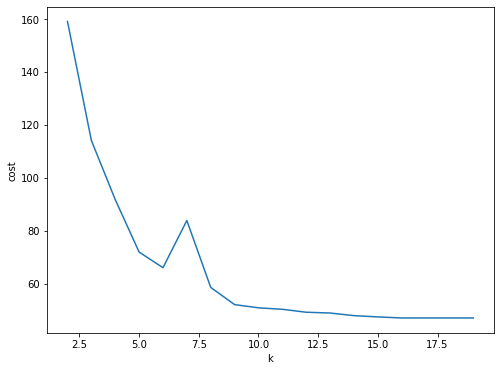

In [84]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [85]:
#Train the machine learning model
k = 10
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[4.7045455  3.12272727 1.41363635 0.2       ]
[7.53999991 3.14999998 6.38999996 2.08999997]
[5.         2.30000001 3.27499998 1.02500001]
[5.24285712 3.66785715 1.5        0.28214286]
[6.60800001 3.064      5.55199999 2.12799997]
[6.63333333 3.03333332 4.63333333 1.45833332]
[5.75000005 2.82       4.93000002 1.90999999]
[6.18333336 2.58333333 4.89166665 1.53333332]
[5.78666658 2.92000001 4.31999995 1.36666665]
[5.625      2.54166669 3.86666667 1.15833333]


In [86]:
#assigning the individual rows to the nearest cluster centroid
transformed = model.transform(df_kmeans).select('id', 'prediction')
rows = transformed.collect()
print(rows[:3])

[Row(id='row0', prediction=3), Row(id='row1', prediction=0), Row(id='row2', prediction=0)]


In [87]:
#From the rows returned by the collect method it is trivial to create a new dataframe using our SQL context.
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()

+-----+----------+
|   id|prediction|
+-----+----------+
| row0|         3|
| row1|         0|
| row2|         0|
| row3|         0|
| row4|         3|
| row5|         3|
| row6|         0|
| row7|         3|
| row8|         0|
| row9|         0|
|row10|         3|
|row11|         0|
|row12|         0|
|row13|         0|
|row14|         3|
|row15|         3|
|row16|         3|
|row17|         3|
|row18|         3|
|row19|         3|
+-----+----------+
only showing top 20 rows



In [89]:
#Join the prediction with the original data
df_pred = df_pred.join(Df, 'id')
df_pred.show()

+-----+----------+-----------+----------+-----------+----------+
|   id|prediction|sepalLength|sepalWidth|petalLength|petalWidth|
+-----+----------+-----------+----------+-----------+----------+
| row0|         3|        5.1|       3.5|        1.4|       0.2|
| row1|         0|        4.9|       3.0|        1.4|       0.2|
| row2|         0|        4.7|       3.2|        1.3|       0.2|
| row3|         0|        4.6|       3.1|        1.5|       0.2|
| row4|         3|        5.0|       3.6|        1.4|       0.2|
| row5|         3|        5.4|       3.9|        1.7|       0.4|
| row6|         0|        4.6|       3.4|        1.4|       0.3|
| row7|         3|        5.0|       3.4|        1.5|       0.2|
| row8|         0|        4.4|       2.9|        1.4|       0.2|
| row9|         0|        4.9|       3.1|        1.5|       0.1|
|row10|         3|        5.4|       3.7|        1.5|       0.2|
|row11|         0|        4.8|       3.4|        1.6|       0.2|
|row12|         0|       

In [90]:
#Convert to Pandas dataframe
pddf_pred = df_pred.toPandas().set_index('id')
pddf_pred.head()

,prediction,sepalLength,sepalWidth,petalLength,petalWidth
id,,,,,
row0,3,5.1,3.5,1.4,0.2
row1,0,4.9,3.0,1.4,0.2
row2,0,4.7,3.2,1.3,0.2
row3,0,4.6,3.1,1.5,0.2
row4,3,5.0,3.6,1.4,0.2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Predicted   0   1  2   3   4   5  6  7   8   9
Actual                                        
0          22   0  0  28   0   0  0  0   0   0
1           0   0  4   0   0  12  1  6  15  12
2           0  10  0   0  25   0  9  6   0   0


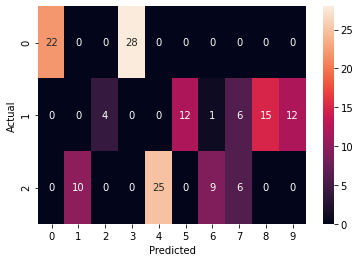

In [92]:
import seaborn as sn
confusion_matrix = pd.crosstab(iris.target, pddf_pred['prediction'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()